In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import os
import matplotlib.pyplot as plt
import math
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
np.random.seed(17154016)
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from  more_itertools import unique_everseen
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
import lightgbm as lgb

# Any results you write to the current directory are saved as output.

## Importing given data

In [50]:
import pandas as pd
df = pd.read_csv("attrition.csv")

In [54]:
print("shape of the given data :",df.shape)
print('features in given data  :',df.columns)
df.head()

shape of the given data : (327, 19)
features in given data  : Index(['S.No', 'EmpID', 'Emp Name', 'DOJ', 'Designation', 'Grade', 'Location',
       'In Active Date', 'Tenure', 'Gender', 'Education', 'Age', 'Last Rating',
       'Monthly Income', 'Engagement Score (% Satisfaction)', 'Marital Status',
       'Zone', 'Remarks', 'Attrition'],
      dtype='object')


,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,Attrition
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager,Yes
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Jayanagar,06-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation,Yes
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Indore,07-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager,Yes
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Admin Gujarat,03-Apr-12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth,Yes
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Jagdishpuram,10-Apr-12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager,Yes


In [55]:
df1=df.drop(['S.No','Emp Name','DOJ','In Active Date'],axis=1)
df1=df1.set_index('EmpID')
df1.head()

,Designation,Grade,Location,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,Attrition
EmpID,,,,,,,,,,,,,,
XYZ2685,Sales Executive,E1,Bhavnagar,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager,Yes
XYZ2490,Technical Services Officer,M2,Jayanagar,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation,Yes
XYZ2662,Sales Executive,E1,Indore,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager,Yes
XYZ1679,AM - Sales,M1,Admin Gujarat,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth,Yes
XYZ2378,Sales Executive,E1,Jagdishpuram,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager,Yes


# Using public dataset

## IBM dataset is used 

We have used the IBM Dataset(https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) to train the model. Initially as we can see both the datasets are not same. So we use the Exploratory data analysis to exclude some features from both the datasets. Also many categories of a features were not same. For example in Designation. So we have increased the features in that case.

In [58]:
new_df=pd.read_csv("ibm.csv")
new_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## About the IBM data

**Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.**

Education                : 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction  : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement           : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction          : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating        : 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance          : 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

## Preprocessing the ibm data

### Combining common features of given and ibm dataset

In [59]:
new_df=new_df.drop(['BusinessTravel','DailyRate','Department','DistanceFromHome','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','MonthlyRate', 'NumCompaniesWorked',
       'Over18','OverTime', 'PercentSalaryHike','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsSinceLastPromotion', 'YearsWithCurrManager','YearsInCurrentRole'],axis=1)

In [61]:
new_df=new_df.rename(columns={"JobLevel": "Grade", "JobRole": "Designation","MaritalStatus":"Marital Status","PerformanceRating":"Last Rating","MonthlyIncome":"Monthly Income","YearsAtCompany":"Tenure","JobSatisfaction":"Engagement Score (% Satisfaction)"})
new_df =new_df[['Designation', 'Grade', 'Tenure', 'Gender', 'Education','Age', 'Last Rating', 'Monthly Income','Engagement Score (% Satisfaction)', 'Marital Status','Attrition']]
new_df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Attrition
0,Sales Executive,2,6,Female,2,41,3,5993,4,Single,Yes
1,Research Scientist,2,10,Male,1,49,4,5130,2,Married,No
2,Laboratory Technician,1,0,Male,2,37,3,2090,3,Single,Yes
3,Research Scientist,1,8,Female,4,33,3,2909,3,Married,No
4,Laboratory Technician,1,2,Male,1,27,3,3468,2,Married,No


In [62]:
df1_new=df1.drop(['Location','Zone','Remarks'],axis=1)
df1_new.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Attrition
EmpID,,,,,,,,,,,
XYZ2685,Sales Executive,E1,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,Yes
XYZ2490,Technical Services Officer,M2,1. 9,Male,MBA,36,2,52155,45%,Single,Yes
XYZ2662,Sales Executive,E1,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,Yes
XYZ1679,AM - Sales,M1,3 .11,Male,Bachelors,33,2,54311,82%,Single,Yes
XYZ2378,Sales Executive,E1,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,Yes


#### Comparing features of ibm and given dataset

In [65]:
print("ibm dataset features :",new_df.columns)
print("bitgrit dataset features :",df1_new.columns)

ibm dataset features : Index(['Designation', 'Grade', 'Tenure', 'Gender', 'Education', 'Age',
       'Last Rating', 'Monthly Income', 'Engagement Score (% Satisfaction)',
       'Marital Status', 'Attrition'],
      dtype='object')
bitgrit dataset features : Index(['Designation', 'Grade', 'Tenure', 'Gender', 'Education', 'Age',
       'Last Rating', 'Monthly Income', 'Engagement Score (% Satisfaction)',
       'Marital Status', 'Attrition'],
      dtype='object')


### Changes to make both dataset similar

**Following changes are made to make both the dataset similar**

1-Some of the columns like age, gender, monthly income, marital status, Designation are excatly matching
<br /> 2-Tenure are equivalent to the yearsincompany in ibm dataset
<br /> 3-Last Rating is same as PerformanceRating
<br /> 4-Grade is same as joblevel
<br /> 5-Education as in ibm Education column contain label 1,2,3 and 4 here 3 means Bachelors and 4 is for Master which is assumed to be equivalet to the MBA in given dataset
<br /> 6-Engagement Score (% Satisfaction) is assumed to be equivalent to the JobSatisfaction(are in levels 1,2,3 and 4). Assuming that 4 level means 95% satisfaction so 1 level means (95/4)% and 2 is (95/4)`*`2 % and 3 is (95/4)`*`3 %

In [70]:
def gender(str):
    if str=='Male':
        return 1
    else:
        return 0
def marital_status(str):
    if str=='Married':
        return 0
    if str=='Divorced':
        return 1
    else:
        return 2
def attrition(str):
    if str=='Yes':
        return 1
    else:
        return 0
def Grade(str):
    if str=='E1':
        return 1
    if str=='E2':
        return 2
    if str=='M1':
         return 3
    if str=='M2':
        return 4
    if str=='M3':
        return 5
    if str=='M4':
         return 6
    else:
        return 7
def edu(str):
    if str=='Bachelors':
        return 3
    else:
        return 4
def per(str):
    return float(str.replace('%',''))

In [71]:
df1_new['Gender']=df1_new['Gender'].apply(gender)
new_df['Gender']=new_df['Gender'].apply(gender)
df1_new['Marital Status']=df1_new['Marital Status'].apply(marital_status)
new_df['Marital Status']=new_df['Marital Status'].apply(marital_status)
df1_new['Attrition']=df1_new['Attrition'].apply(attrition)
new_df['Attrition']=new_df['Attrition'].apply(attrition)
df1_new['Grade']=df1_new['Grade'].apply(Grade)
df1_new['Education']=df1_new['Education'].apply(edu)

In [72]:
df1_new['Engagement Score (% Satisfaction)']=df1_new['Engagement Score (% Satisfaction)'].apply(per)
df1_new.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Attrition
EmpID,,,,,,,,,,,
XYZ2685,Sales Executive,1,1. 6,0,3,27,4,25535,2.0,1,1
XYZ2490,Technical Services Officer,4,1. 9,1,4,36,2,52155,45.0,2,1
XYZ2662,Sales Executive,1,1. 5,1,3,24,4,26438,18.0,1,1
XYZ1679,AM - Sales,3,3 .11,1,3,33,2,54311,82.0,2,1
XYZ2378,Sales Executive,1,2 .1,1,3,24,4,26702,49.0,1,1


In [73]:
new_df['Engagement Score (% Satisfaction)']=(95/4)*new_df['Engagement Score (% Satisfaction)']
new_df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Attrition
0,Sales Executive,2,6,0,2,41,3,5993,95.00,2,1
1,Research Scientist,2,10,1,1,49,4,5130,47.50,0,0
2,Laboratory Technician,1,0,1,2,37,3,2090,71.25,2,1
3,Research Scientist,1,8,0,4,33,3,2909,71.25,0,0
4,Laboratory Technician,1,2,1,1,27,3,3468,47.50,0,0


Assuming that 4 score is equivalant to the 95% job satisfaction.So 1 means 95/4 % satisfaction.This is done because in given dataset satisfaction is in percentage

In [74]:
print("bitgrit data shape:"+str(df1_new.shape))
print("ibm_dataset:"+str(new_df.shape))

bitgrit data shape:(327, 11)
ibm_dataset:(1470, 11)


## Thing should be noted

**In final combined dataset first 327 examples are of given bitgrit examples while rest are of ibm dataset examples**

# Attrition prediction : Model 1

### Concating both the dataset and split into X(combine) and Y

In [75]:
combine=pd.concat(([df1_new,new_df]))
y=combine['Attrition']
combine=combine.drop(['Attrition'],axis=1)
print("shape of combined data:"+str(combine.shape))
combine.head()

shape of combined data:(1797, 10)


,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status
XYZ2685,Sales Executive,1,1. 6,0,3,27,4,25535,2.0,1
XYZ2490,Technical Services Officer,4,1. 9,1,4,36,2,52155,45.0,2
XYZ2662,Sales Executive,1,1. 5,1,3,24,4,26438,18.0,1
XYZ1679,AM - Sales,3,3 .11,1,3,33,2,54311,82.0,2
XYZ2378,Sales Executive,1,2 .1,1,3,24,4,26702,49.0,1


### Encoding Designation

In [78]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
c=combine.values 
c[:, 0] = labelencoder.fit_transform(c[:, 0])
combine=pd.DataFrame(c)
combine.columns=['Designation', 'Grade', 'Tenure', 'Gender', 'Education', 'Age',
       'Last Rating', 'Monthly Income', 'Engagement Score (% Satisfaction)',
       'Marital Status']
combine.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status
0,11,1,1. 6,0,3,27,4,25535,2,1
1,16,4,1. 9,1,4,36,2,52155,45,2
2,11,1,1. 5,1,3,24,4,26438,18,1
3,1,3,3 .11,1,3,33,2,54311,82,2
4,12,1,2 .1,1,3,24,4,26702,49,1


### Convert to Categorical by one-hot-encoding

In [80]:
# one hot encode
a= pd.DataFrame(to_categorical(combine['Gender']))
b= pd.DataFrame(to_categorical(combine['Designation']))
c= pd.DataFrame(to_categorical(combine['Marital Status']))
join=pd.concat([a,b,c],axis=1)

In [81]:
combine_dr=combine.drop(['Gender','Designation','Marital Status','Tenure'],axis=1)
train=pd.concat([combine_dr,join],axis=1)

Tenure is also dropped as it is in string format. It will be converted into number of months as 1.11 means 1 year and 11 month while 1.9 means 1 year and 9 months mathematically 1.9>1.11 so there is a need to convert tenure into months

In [148]:
print("shape of combine_dr",combine_dr.shape)
print("all categorical columns",join.shape)
print("shape of final train data after concat",train.shape)

shape of combine_dr (1797, 6)
all categorical columns (1797, 23)
shape of final train data after concat (1797, 29)


## Converting Tenure into months

### For IBM dataset

As we know first 327 examples are of given dataset examples while rest are from ibm dataset

In [95]:
a=pd.DataFrame(combine.iloc[327:,2]*12)## multiplying by 12 as 1 year containg 12 months
a=a.rename(columns={'Tenure':'Tenure in month'})
a.head()

,Tenure in month
327,72
328,120
329,0
330,96
331,24


### For Given bitgrit dataset

In [96]:
import math
x=combine.iloc[:327,2]## tenure column
year=[]
m=[]#math.modf(x)
month=[]
for i in x:
    b=i.split('.')
    year.append(int(b[0]))
    month.append(int(b[1]))
year=pd.DataFrame(year,columns=['Tenure in month'])
month=pd.DataFrame(month,columns=['Tenure in month'])
month=pd.DataFrame(year*12+month)
month.head()

,Tenure in month
0,18
1,21
2,17
3,47
4,25


In [97]:
month=pd.concat([month,a],axis=0)
train_final=pd.concat([month,train],axis=1)
print("Shape of the final training dataset :",train_final.shape)
train_final.head()

Shape of the final training dataset : (1797, 30)


,Tenure in month,Grade,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),0,1,0,...,11,12,13,14,15,16,17,0,1,2
0,18,1,3,27,4,25535,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,4,4,36,2,52155,45,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,17,1,3,24,4,26438,18,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47,3,3,33,2,54311,82,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25,1,3,24,4,26702,49,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Normalize the data

In [99]:
import pandas as pd
from sklearn import preprocessing

x = train_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_final)
x = pd.DataFrame(x_scaled)
x.head()

D:\anacondanik\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float32, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.037500,0.000000,0.50,0.214286,0.75,0.105287,0.02,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.043750,0.500000,0.75,0.428571,0.25,0.219563,0.45,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.035417,0.000000,0.50,0.142857,0.75,0.109163,0.18,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.097917,0.333333,0.50,0.357143,0.25,0.228818,0.82,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.052083,0.000000,0.50,0.142857,0.75,0.110296,0.49,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [100]:
x_val=x.iloc[:327,:]
y_val=y.iloc[:327]
x_train=x.iloc[327:,:]
y_train=y.iloc[327:,]

## Use model for prediction and using given dataset as cross-validate

### Using different Classifiers

In [101]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis()]

In [102]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [136]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("-"*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_val)
    acc = accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print("-"*30)
print("="*30)

------------------------------
KNeighborsClassifier
****Results****
Accuracy: 7.3394%
------------------------------
------------------------------
DecisionTreeClassifier
****Results****
Accuracy: 32.7217%
------------------------------
------------------------------
RandomForestClassifier
****Results****
Accuracy: 5.1988%
------------------------------
------------------------------
GradientBoostingClassifier
****Results****
Accuracy: 30.2752%
------------------------------
------------------------------
LinearDiscriminantAnalysis
****Results****
Accuracy: 84.7095%
------------------------------


D:\anacondanik\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Using lgbm

In [105]:
features = [c for c in x.columns]
target = y_train
target.values
param = {
    'bagging_freq': 5,          'bagging_fraction': 0.38,   'boost_from_average':'false',   'boost': 'gbdt',
    'feature_fraction': 0.045,   'learning_rate': 0.01,     'max_depth': -1,                'metric':'auc',
    'min_data_in_leaf': 80,     'min_sum_hessian_in_leaf': 10.0,'num_leaves': 13,           'num_threads': 8,
    'tree_learner': 'serial',   'objective': 'binary',      'verbosity': 1
}
folds = StratifiedKFold(n_splits=15, shuffle=False, random_state=17154016)
oof = np.zeros(len(x_train))
predictions = np.zeros(len(x_val))

In [106]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train.values, target.values)):
    print("Fold :{}".format(fold_ + 1))
    trn_data = lgb.Dataset(x_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(x_train.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(param, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(x_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    predictions += clf.predict(x_val[features], num_iteration=clf.best_iteration) / folds.n_splits
sys.stdout.write("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold :1
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.776913	valid_1's auc: 0.700301
Early stopping, best iteration is:
[8]	training's auc: 0.673874	valid_1's auc: 0.729292
Fold :2
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.778629	valid_1's auc: 0.596386
Early stopping, best iteration is:
[10]	training's auc: 0.692457	valid_1's auc: 0.646461
Fold :3
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.764694	valid_1's auc: 0.834714
[2000]	training's auc: 0.776502	valid_1's auc: 0.842997
[3000]	training's auc: 0.783584	valid_1's auc: 0.855045
[4000]	training's auc: 0.788582	valid_1's auc: 0.864834
Early stopping, best iteration is:
[3414]	training's auc: 0.785446	valid_1's auc: 0.867846
Fold :4
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.775106	valid_1's auc: 0.721799
Early stopping, best iteration is:
[72]	training's auc: 

### Feature importance

D:\anacondanik\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


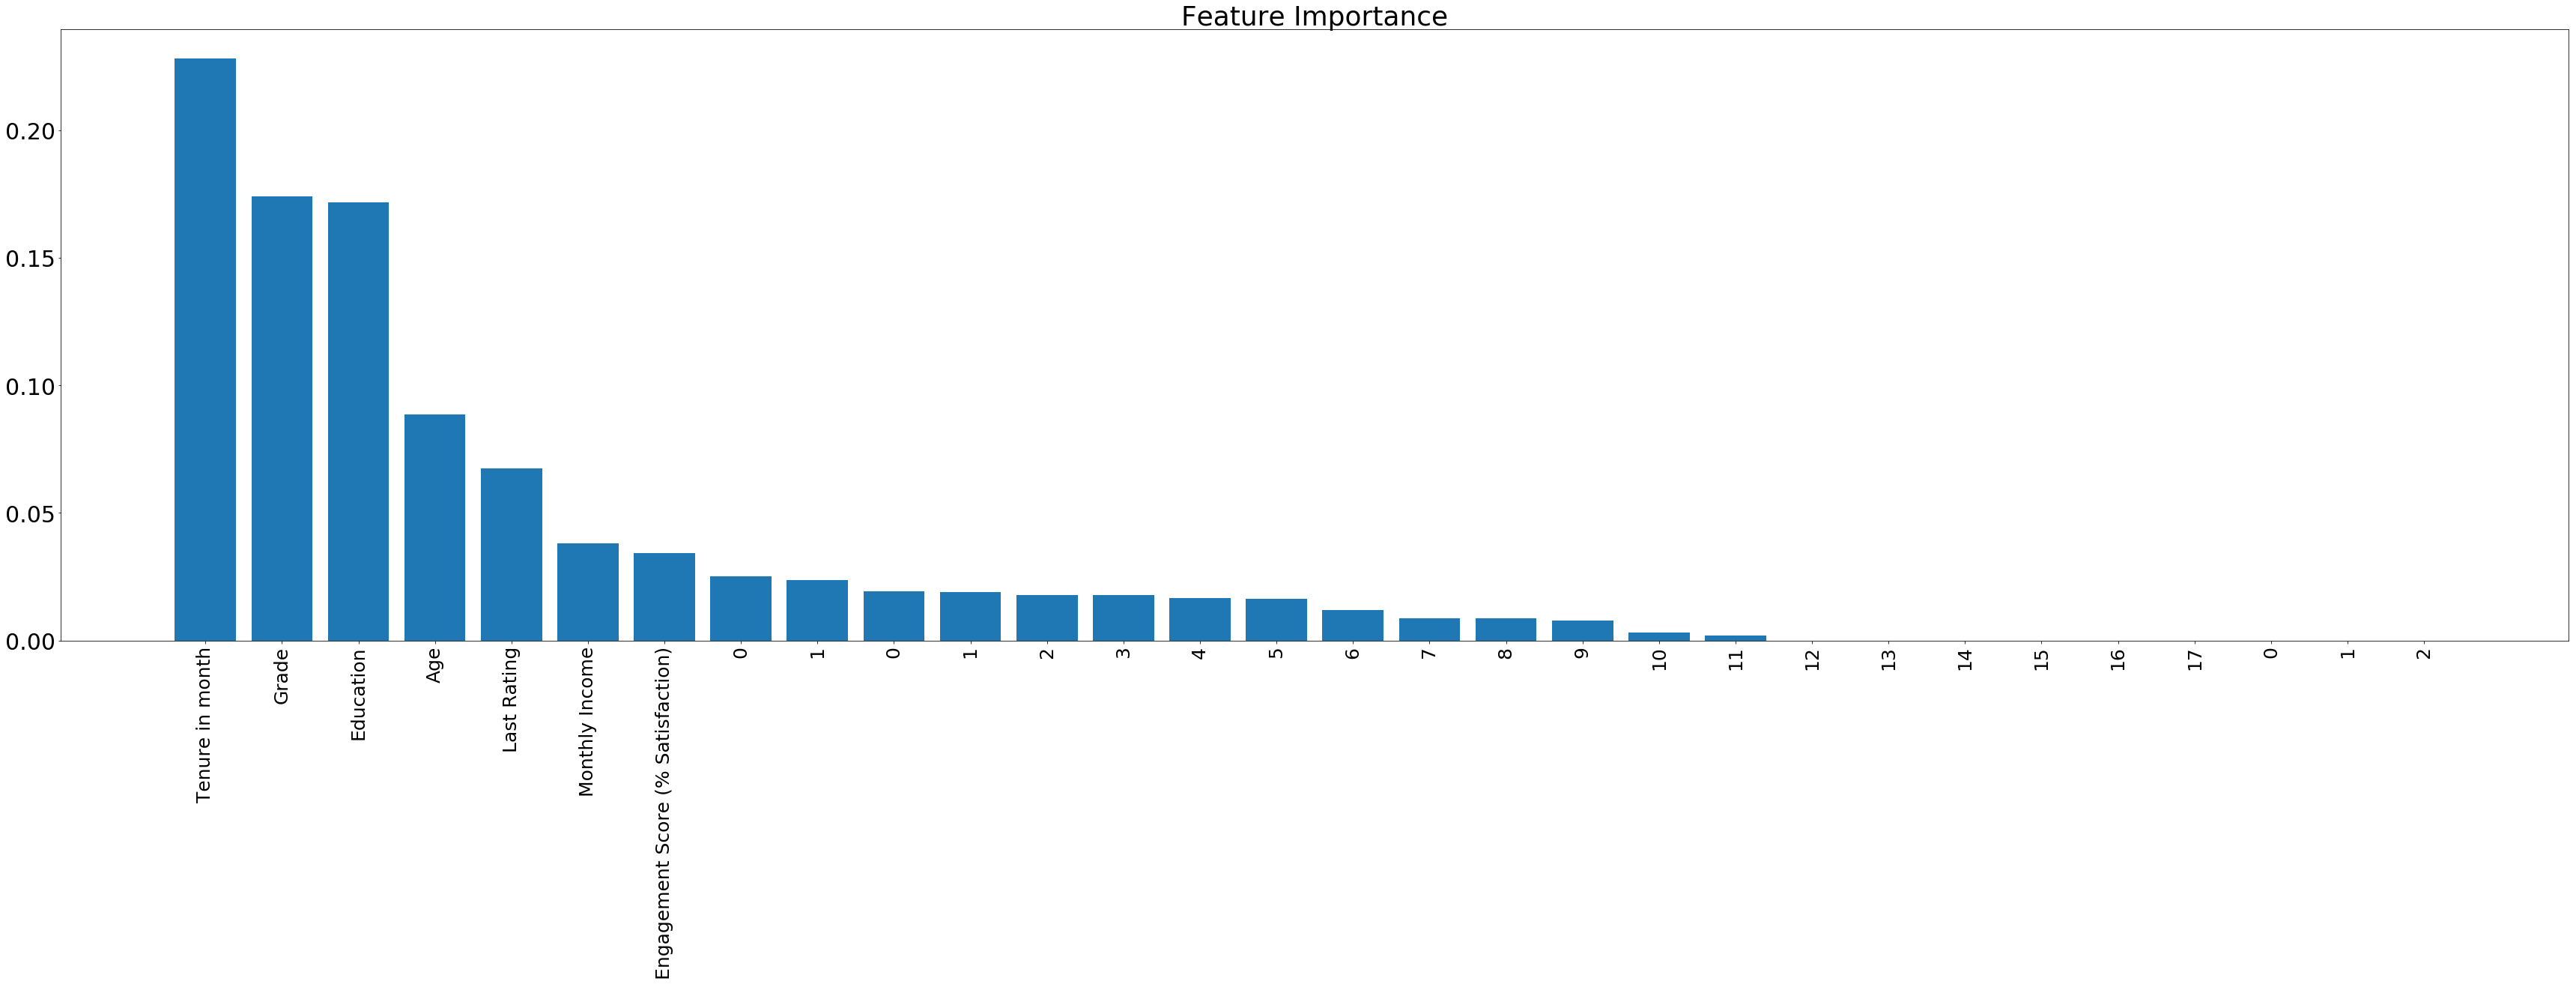

In [108]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = clf.fit(x_train, y_train)
importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
plt.rcParams.update({'font.size': 30})
# Rearrange feature names so they match the sorted feature importances
names = train_final.columns
plt.figure(figsize=(60,15))
# Barplot: Add bars
plt.bar(range(x_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90, fontsize = 25)

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

Tenure is the important feature followed by grade and education 

# Tenure predictions : Model 2

## Preparing Data for Tenure Predictions

Concating train_final which is the combined dataset of ibm and given data it don't have attrition column. Here we will not use attrition column

In [139]:
data_tenure=train_final 
print("shape of training data for tenure prdiciton",data_tenure.shape)
data_tenure.head()

shape of training data for tenure prdiciton (1797, 30)


,Tenure in month,Grade,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),0,1,0,...,11,12,13,14,15,16,17,0,1,2
0,18,1,3,27,4,25535,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,4,4,36,2,52155,45,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,17,1,3,24,4,26438,18,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47,3,3,33,2,54311,82,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25,1,3,24,4,26702,49,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
x = train_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_tenure)
X = pd.DataFrame(x_scaled,columns=data_tenure.columns)
y_tenure=pd.DataFrame(X['Tenure in month'])
x_tenure=X.drop(['Tenure in month'],axis=1) ## Dropping tenure column
print('Shape of x_tenure :',x_tenure.shape)
x_tenure.head()

Shape of x_tenure : (1797, 29)


D:\anacondanik\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float32, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Grade,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),0,1,0,1,...,11,12,13,14,15,16,17,0,1,2
0,0.000000,0.50,0.214286,0.75,0.105287,0.02,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.500000,0.75,0.428571,0.25,0.219563,0.45,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.000000,0.50,0.142857,0.75,0.109163,0.18,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.333333,0.50,0.357143,0.25,0.228818,0.82,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.50,0.142857,0.75,0.110296,0.49,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [142]:
y_tenure.head()

,Tenure in month
0,0.037500
1,0.043750
2,0.035417
3,0.097917
4,0.052083


### Splitting data into cross-validate(given data) and training data(ibm data)

In [143]:
x_val_tenure=x_tenure.iloc[:327,:]## first 327 are given examples rest are of ibm dataset examples
y_val_tenure=y_tenure.iloc[:327]
x_train_tenure=x_tenure.iloc[327:,:]
y_train_tenure=y_tenure.iloc[327:]
# labeling column so each column as unique name
x_train_tenure=pd.DataFrame(np.array(x_train_tenure))
y_train_tenure=pd.DataFrame(np.array(y_train_tenure))
x_val_tenure=pd.DataFrame(np.array(x_val_tenure))
y_val_tenure=pd.DataFrame(np.array(y_val_tenure))
print("shape of bitgrt-given dataset (cross-val)   : ",x_val_tenure.shape,y_val_tenure.shape) 
print("shape of ibm public dataset  (training data):",x_train_tenure.shape,y_train_tenure.shape)

shape of bitgrt-given dataset (cross-val)   :  (327, 29) (327, 1)
shape of ibm public dataset  (training data): (1470, 29) (1470, 1)


### Training on Different regressor algorithms

In [144]:
#XGBRegressor()
my_model = XGBRegressor()  
my_model.fit(x_train_tenure,y_train_tenure)
xgbpredictions = my_model.predict(x_val_tenure)

#RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=1234)
rf.fit(x_train_tenure,y_train_tenure)
rfpredictions = rf.predict(x_val_tenure)

#ExtraTreesRegressor
extra_tree = ExtraTreesRegressor()
extra_tree.fit(x_train_tenure,y_train_tenure)
etpredictions = extra_tree.predict(x_val_tenure)

#GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train_tenure,y_train_tenure)
y_pred =gbr.predict(x_val_tenure)

#SVR
reg=SVR()
reg.fit(x_train_tenure,y_train_tenure)
y_predsvr = reg.predict(x_val_tenure)


print("Root Mean Absolute Error")
print("XGBRegressor              : ",sqrt(mean_squared_error(xgbpredictions, y_val_tenure)))
print("RandomForestRegressor     : ",sqrt(mean_squared_error(rfpredictions, y_val_tenure)))
print("ExtraTreesRegressor       : ",sqrt(mean_squared_error(etpredictions, y_val_tenure)))
print("GradientBoostingRegressor : ",sqrt(mean_squared_error(y_pred, y_val_tenure)))
print("Support Vector Regressor  : ",sqrt(mean_squared_error(y_predsvr, y_val_tenure)))

D:\anacondanik\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Root Mean Absolute Error
XGBRegressor              :  0.373208852699763
RandomForestRegressor     :  0.31837496703996626
ExtraTreesRegressor       :  0.18876169255379394
GradientBoostingRegressor :  0.3895440296919779
Support Vector Regressor  :  0.12491605453666697


D:\anacondanik\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anacondanik\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
D:\anacondanik\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anacondanik\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anacondanik\lib\site-packages\skle

### Training on lightgbm

In [145]:
lgb_train = lgb.Dataset(x_train_tenure,y_train_tenure)
lgb_eval = lgb.Dataset(x_val_tenure,  y_val_tenure, reference=lgb_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'verbose': 1
}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

[1]	valid_0's l2: 0.0176894	valid_0's l1: 0.125621
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.0193988	valid_0's l1: 0.131241
[3]	valid_0's l2: 0.0248822	valid_0's l1: 0.150587
[4]	valid_0's l2: 0.0257098	valid_0's l1: 0.153002
[5]	valid_0's l2: 0.0322586	valid_0's l1: 0.173017
[6]	valid_0's l2: 0.0311662	valid_0's l1: 0.169652
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0176894	valid_0's l1: 0.125621


In [146]:
y_pred = gbm.predict(x_val_tenure, num_iteration=gbm.best_iteration)
print(" Root Mean Absolute Error by lgbm : ",sqrt(mean_squared_error(y_pred, y_val_tenure)))

 Root Mean Absolute Error by lgbm :  0.13300139337354597


As we can observe Support Vector Regressor is giving the lowest rmse and is the best model among ensemble model for tenure prediction. Therefore Industry may can use this model and give promotion or other things like bonus as employee predicted tenure time is nearer

### Feature Importance

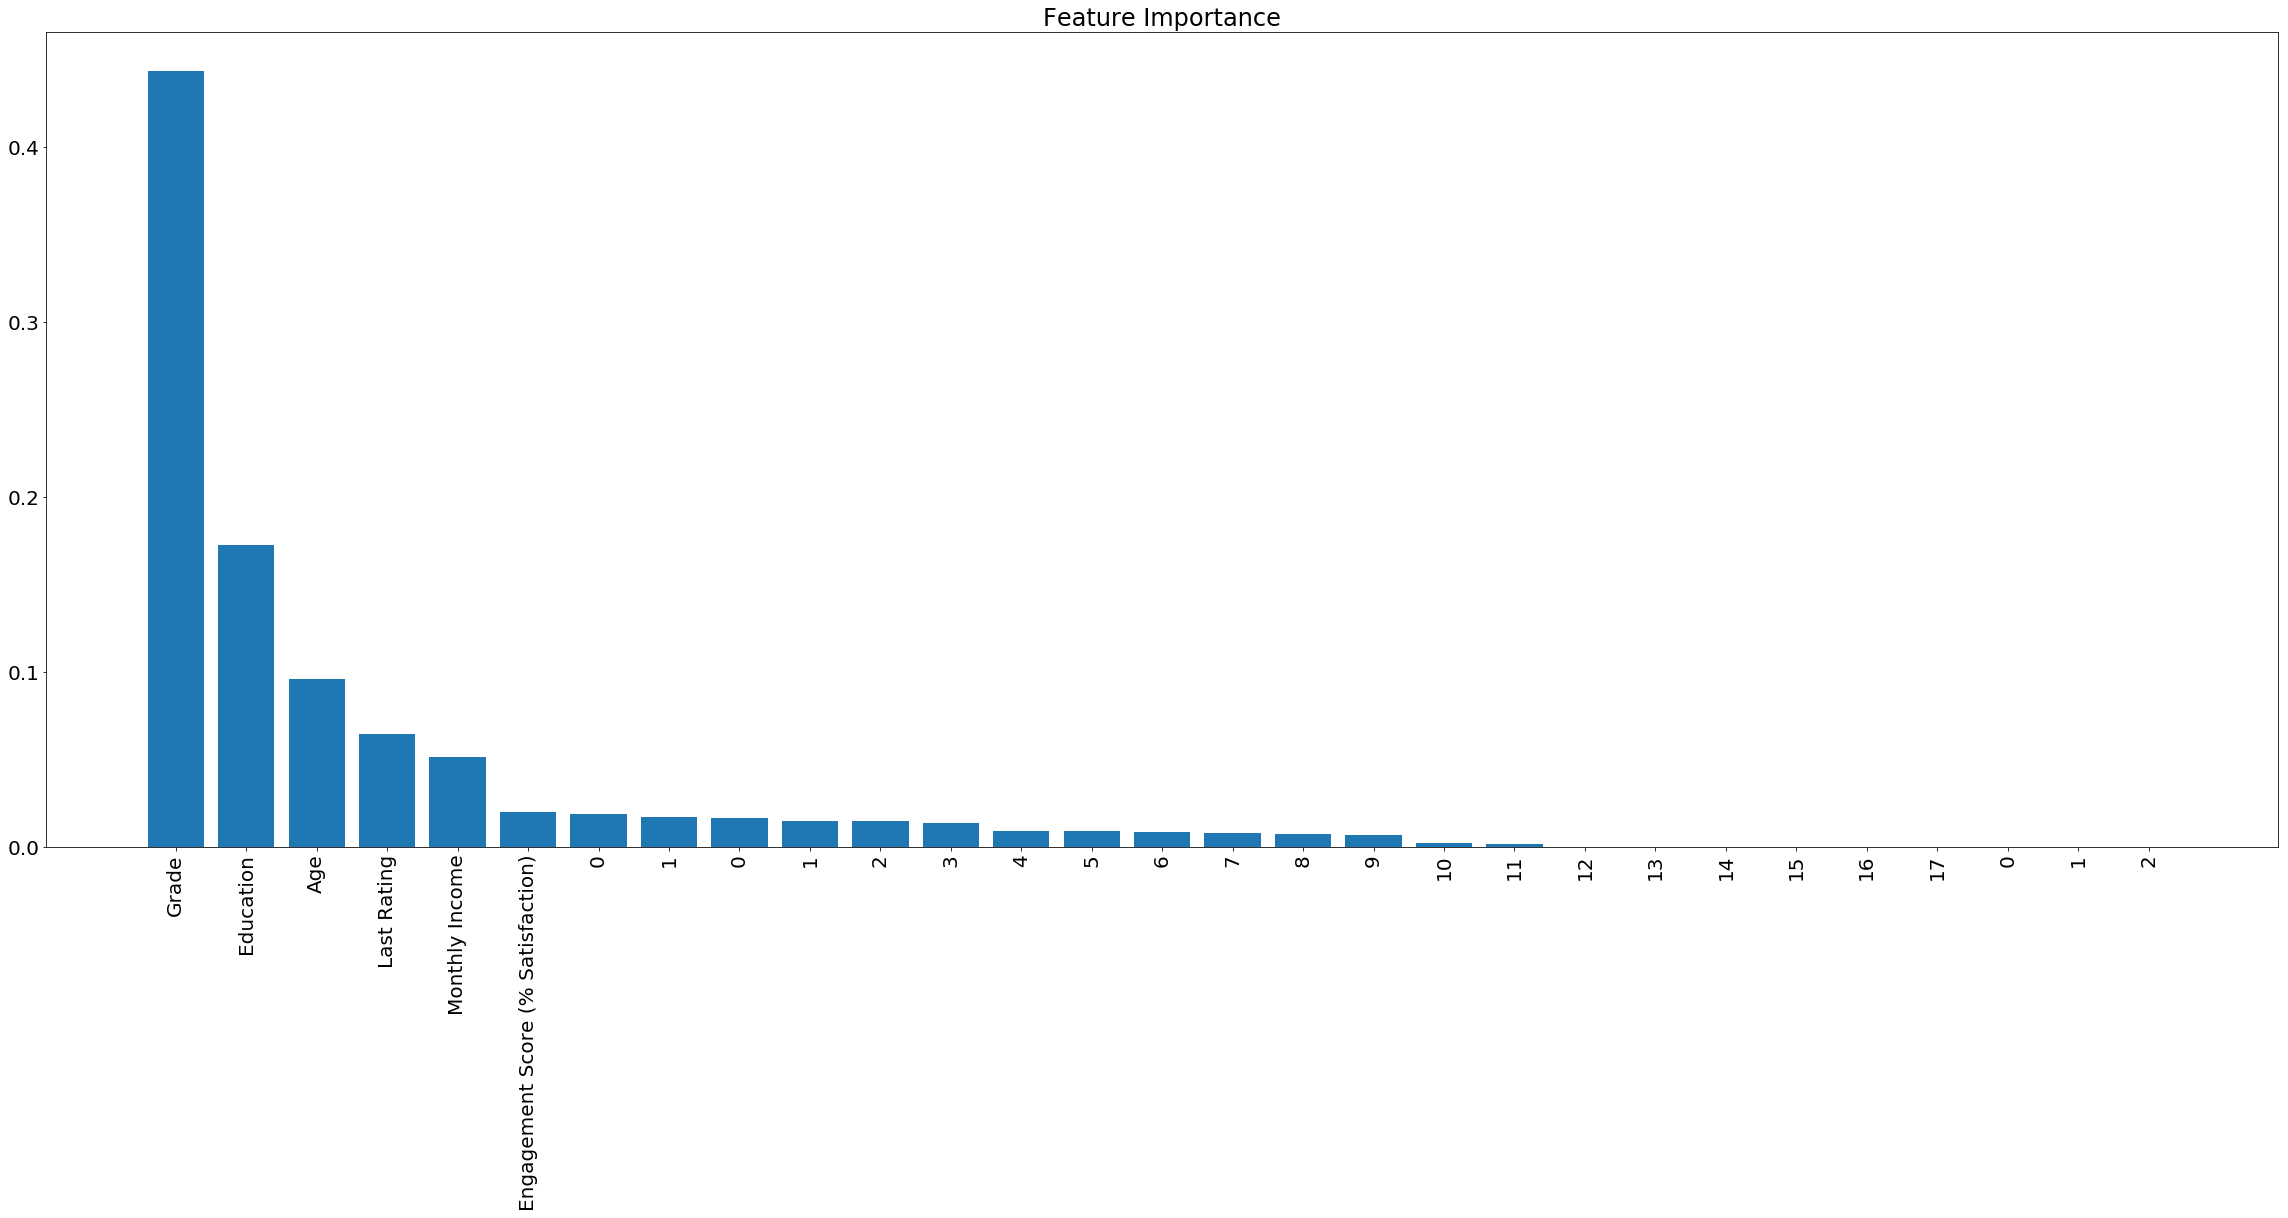

In [147]:
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
plt.rcParams.update({'font.size': 20})
# Rearrange feature names so they match the sorted feature importances
names = x_tenure.columns
plt.figure(figsize=(40,15))
# Barplot: Add bars
plt.bar(range(x_train_tenure.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x_train_tenure.shape[1]), names, rotation=90, fontsize = 20)

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

Grade have more feature importance comparitively than other features followed by education and age

## The End
**Our report are based on our observations and model predictions**